TWO-WAY ANOVA: EFFECT OF FERTILIZER AND CROP TYPE ON YIELD

DESCRIPTIVE STATISTICS
--------------------------------------------------

Descriptive Statistics filtered by Blend X
--------------------------------------------------
                           Corn    Rice     Soy   Wheat
Valid                     5.000   5.000   5.000   5.000
Mean                    135.400 141.200 175.800 131.800
Std. Deviation           26.605  18.820  16.694  29.055
Skewness                  0.764  -0.632  -0.385   0.357
Std. Error of Skewness    0.913   0.913   0.913   0.913
Kurtosis                 -0.775  -2.650  -1.062  -2.313
Std. Error of Kurtosis    2.000   2.000   2.000   2.000
Shapiro-Wilk              0.933   0.840   0.976   0.923
P-value of Shapiro-Wilk   0.620   0.164   0.911   0.547
--------------------------------------------------

Descriptive Statistics filtered by Blend Y
--------------------------------------------------
                           Corn    Rice     Soy   Wheat
Valid    

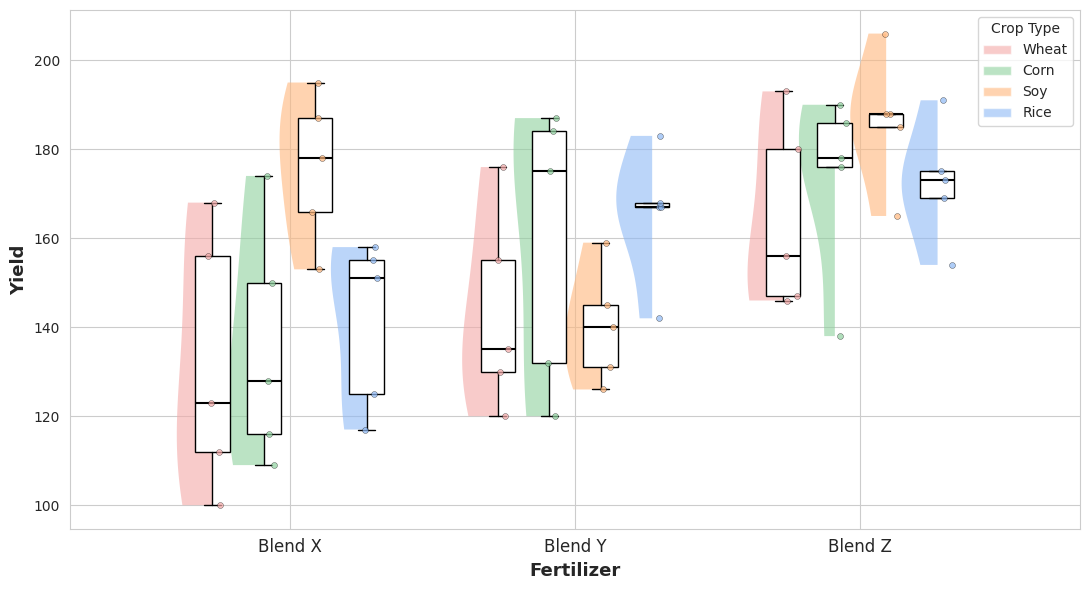

Raincloud plot saved as 'fertilizer_raincloud_plot.png'


Test for Equality of Variances
(Levene's)
--------------------------------------------------
F           df1          df2          p
--------------------------------------------------
0.675       11.000       48.000       0.755
--------------------------------------------------
 


TWO-WAY ANOVA RESULTS
------------------------------------------------------------------------------------------
                         sum_sq     df     F  PR(>F)
C(Fertilizer)          8782.900  2.000 9.933   0.000
C(Crop)                3411.650  3.000 2.572   0.065
C(Fertilizer):C(Crop)  6225.900  6.000 2.347   0.046
Residual              21220.400 48.000   NaN     NaN 

4. EFFECT SIZES (η²)
------------------------------------------------------------------------------------------
Fertilizer η² = 0.2216
Crop η²       = 0.0861
Interaction η² = 0.1571

5. POST-HOC TESTS (Tukey HSD for 12 groups — SPSS style)
---------------------------------------

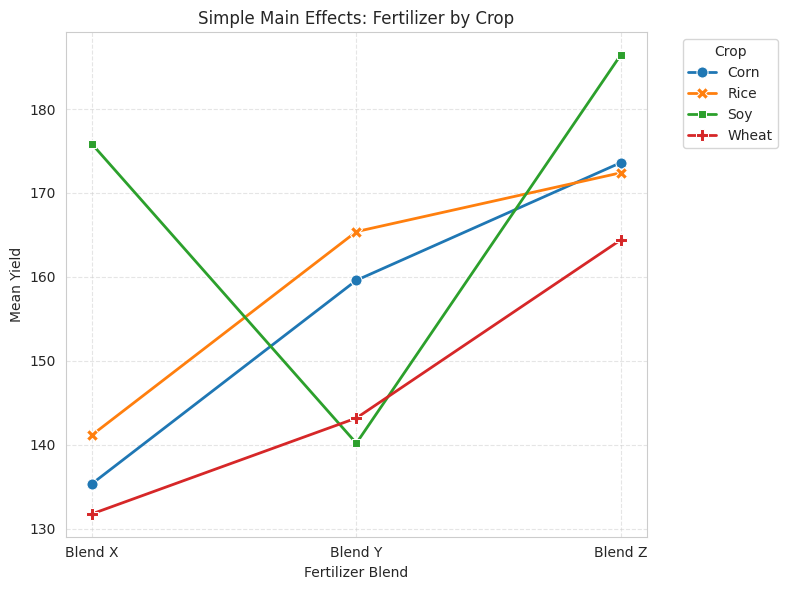

Plot A generated.

------------------------------------------------------------------------------------------

--- B. Simple Main Effects of CROP (within Fertilizer) ---
Fertilizer |  Sum of Squares |  df |  Mean Square |        F |        p
--------------------------------------------------------------------------------
Blend X    |        6125.350 |   3 |     2041.783 |    3.738 |    0.033
Blend Y    |        2269.800 |   3 |      756.600 |    1.627 |    0.223
Blend Z    |        1242.400 |   3 |      414.133 |    1.315 |    0.304


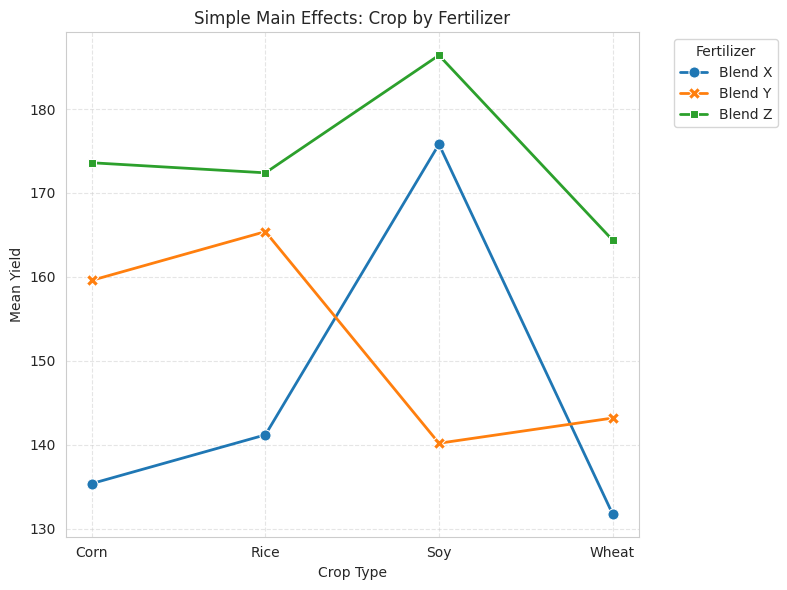

Plot B generated.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# -----------------------------
# DATASET
# -----------------------------
data = {
    'Fertilizer': ['Blend X']*20 + ['Blend Y']*20 + ['Blend Z']*20,
    'Crop': ['Wheat', 'Corn', 'Soy', 'Rice'] * 15,
    'Yield': [
        # Blend X
        123, 128, 166, 151,
        156, 150, 178, 125,
        112, 174, 187, 117,
        100, 116, 153, 155,
        168, 109, 195, 158,
        # Blend Y
        135, 175, 140, 167,
        130, 132, 145, 183,
        176, 120, 159, 142,
        120, 187, 131, 167,
        155, 184, 126, 168,
        # Blend Z
        156, 186, 185, 175,
        180, 138, 206, 173,
        147, 178, 188, 154,
        146, 176, 165, 191,
        193, 190, 188, 169
    ]
}
df = pd.DataFrame(data)

print("="*90)
print("TWO-WAY ANOVA: EFFECT OF FERTILIZER AND CROP TYPE ON YIELD")
print("="*90, "\n")


# -----------------------------
# DESCRIPTIVE STATISTICS
# -----------------------------
print("DESCRIPTIVE STATISTICS")
print("-" * 50)

from scipy.stats import shapiro

#Standard Error of Skewness (SES)
def calc_se_skew(n):
    return np.sqrt((6*n*(n-1)) / ((n-2)*(n+1)*(n+3)))

# Standard Error of Kurtosis (SEK)
def calc_se_kurtosis(n):
    se_skew = calc_se_skew(n)
    return np.sqrt((4*(n**2 - 1) * se_skew**2) / ((n-3)*(n+5)))

for blend in ['Blend X', 'Blend Y', 'Blend Z']:
    print(f"\nDescriptive Statistics filtered by {blend}")
    print("-" * 50)

    subset = df[df['Fertilizer'] == blend]

    table_data = {}

    # Group by Crop
    groups = subset.groupby('Crop')

    for crop_name, group_df in groups:
        yield_data = group_df['Yield']
        n = len(yield_data)

        mean_val = yield_data.mean()
        std_val = yield_data.std()

        w_stat, p_val = shapiro(yield_data)

        skew_val = yield_data.skew()
        kurt_val = yield_data.kurtosis()

        se_skew = calc_se_skew(n)
        se_kurt = calc_se_kurtosis(n)

        table_data[crop_name] = {
            'Valid': int(n),
            'Mean': round(mean_val, 3),
            'Std. Deviation': round(std_val, 3),
            'Skewness': round(skew_val, 3),
            'Std. Error of Skewness': round(se_skew, 3),
            'Kurtosis': round(kurt_val, 3),
            'Std. Error of Kurtosis': round(se_kurt, 3),
            'Shapiro-Wilk': round(w_stat, 3),
            'P-value of Shapiro-Wilk': round(p_val, 3)
        }

    stats_table = pd.DataFrame(table_data)

    print(stats_table.to_string())
    print("-" * 50)


# -------------------------------------------------------------------
# RAINCLOUD PLOT (Hand-built version, no ptitprince)
# -------------------------------------------------------------------
print("2. CREATING RAINCLOUD PLOT (Raincloud-style)...")
print("-"*90)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(11, 6))

fertilizers = ["Blend X", "Blend Y", "Blend Z"]
crops = ["Wheat", "Corn", "Soy", "Rice"]

# Colors similar to sample
crop_colors = {
    "Wheat": "#F4A9A8",     # soft red
    "Corn": "#8FD19E",      # soft green
    "Soy": "#FFB77C",       # orange
    "Rice": "#8EB9F5"       # light blue
}

# Spacing and offset
positions = np.arange(len(fertilizers))
offset = 0.18  # horizontal shift for each crop

for i, crop in enumerate(crops):
    shift = (i - 1.5) * offset
    x_positions = positions + shift

    crop_data = [
        df[(df["Fertilizer"] == fert) & (df["Crop"] == crop)]["Yield"].values
        for fert in fertilizers
    ]

    # Half-violin (raincloud shape)
    violins = plt.violinplot(
        crop_data,
        positions=x_positions,
        widths=0.25,
        showmedians=False,
        showmeans=False,
        showextrema=False
    )

    # Make them "half" violins
    for body in violins["bodies"]:
        m = np.mean(body.get_paths()[0].vertices[:, 0])
        body.get_paths()[0].vertices[:, 0] = np.clip(
            body.get_paths()[0].vertices[:, 0],
            -np.inf, m
        )
        body.set_color(crop_colors[crop])
        body.set_alpha(0.6)
        body.set_edgecolor('none')

    # Boxplot overlay
    plt.boxplot(
        crop_data,
        positions=x_positions,
        widths=0.12,
        patch_artist=True,
        showfliers=False,
        boxprops=dict(facecolor="white", edgecolor="black"),
        medianprops=dict(color="black", linewidth=1.5),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        zorder=3
    )

    # Jittered points
    for j, subset in enumerate(crop_data):
        jitter = np.random.normal(x_positions[j] + 0.02, 0.015, size=len(subset))
        plt.scatter(
            jitter,
            subset,
            color=crop_colors[crop],
            alpha=0.7,
            s=18,
            edgecolor="black",
            linewidth=0.3,
            zorder=5
        )

# Labels and legend
plt.xticks(positions, fertilizers, fontsize=12)
plt.xlabel("Fertilizer", fontsize=13, fontweight="bold")
plt.ylabel("Yield", fontsize=13, fontweight="bold")

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=crop_colors[c], label=c, alpha=0.6) for c in crops
]
plt.legend(handles=legend_elements, title="Crop Type")

plt.tight_layout()
plt.savefig("fertilizer_raincloud_plot.png", dpi=300)
plt.show()

print("Raincloud plot saved as 'fertilizer_raincloud_plot.png'\n")

# -----------------------------
# HOMOGENEITY OF VARIANCES (LEVENE'S TEST)
# -----------------------------
# -----------------------------
# 3. HOMOGENEITY OF VARIANCES (LEVENE'S TEST)
# -----------------------------
from scipy.stats import levene

grouped_data = df.groupby(['Fertilizer', 'Crop'])['Yield']
samples = [group for name, group in grouped_data]

stat, p_val = levene(*samples)

k = len(samples)
N = len(df)
df1 = k - 1
df2 = N - k

print("\nTest for Equality of Variances")
print("(Levene's)")
print("-" * 50)
print("F           df1          df2          p")
print("-" * 50)
print(f"{stat:.3f}       {df1:.3f}       {df2:.3f}       {p_val:.3f}")
print("-" * 50)
print(" \n\n")



# -----------------------------
# TWO-WAY ANOVA
# -----------------------------
print("TWO-WAY ANOVA RESULTS")
print("-"*90)

model = ols('Yield ~ C(Fertilizer) + C(Crop) + C(Fertilizer):C(Crop)', data=df).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table.round(4), "\n")

# Extract p-values
p_fert = anova_table.loc['C(Fertilizer)', 'PR(>F)']
p_crop = anova_table.loc['C(Crop)', 'PR(>F)']
p_int = anova_table.loc['C(Fertilizer):C(Crop)', 'PR(>F)']


# -----------------------------
# Effect Sizes (η²)
# -----------------------------
print("4. EFFECT SIZES (η²)")
print("-"*90)

ss_total = anova_table['sum_sq'].sum()

eta_fert = anova_table.loc['C(Fertilizer)', 'sum_sq'] / ss_total
eta_crop = anova_table.loc['C(Crop)', 'sum_sq'] / ss_total
eta_int  = anova_table.loc['C(Fertilizer):C(Crop)', 'sum_sq'] / ss_total

print(f"Fertilizer η² = {eta_fert:.4f}")
print(f"Crop η²       = {eta_crop:.4f}")
print(f"Interaction η² = {eta_int:.4f}\n")


# ============================================================
# POST-HOC TEST FOR 12 GROUPS (Fertilizer × Crop)
# ============================================================

print("5. POST-HOC TESTS (Tukey HSD for 12 groups — SPSS style)")
print("-" * 90)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a combined interaction variable
df["Group12"] = df["Fertilizer"] + " - " + df["Crop"]

def tukey_spss_12groups(df, factor, dv):
    print(f"\nPost-hoc for {factor} (12 groups):\n")

    tukey = pairwise_tukeyhsd(endog=df[dv],
                              groups=df[factor],
                              alpha=0.05)

    # Extract raw results
    raw = pd.DataFrame(tukey._results_table.data[1:],
                       columns=tukey._results_table.data[0])

    # Convert to numeric
    raw["meandiff"] = raw["meandiff"].astype(float)
    raw["lower"] = raw["lower"].astype(float)
    raw["upper"] = raw["upper"].astype(float)
    raw["p-adj"] = raw["p-adj"].astype(float)

    # --- Compute SE using CI width ---
    q_value = 3.314  # Tukey q critical value for α=.05 (large df)
    raw["SE"] = (raw["upper"] - raw["lower"]) / (2 * q_value)

    # --- Compute t statistic ---
    raw["t"] = raw["meandiff"] / raw["SE"]

    # Rename & reorder
    final = raw.rename(columns={
        "group1": "Group 1",
        "group2": "Group 2",
        "meandiff": "Mean Difference",
        "lower": "Lower",
        "upper": "Upper",
        "p-adj": "p_tukey"
    })[[
        "Group 1", "Group 2",
        "Mean Difference", "Lower", "Upper",
        "SE", "t", "p_tukey"
    ]]

    print(final.to_string(index=False))

# --------------------------------------------------------------
# Run Tukey for the 12-group interaction
# --------------------------------------------------------------

tukey_spss_12groups(df, "Group12", "Yield")
print("\n")

# -------------------------------------------------------------
# DESCRIPTIVES
# -------------------------------------------------------------
print("6. DESCRIPTIVES")
print("-"*90)

# Group by Fertilizer and Crop and calculate metrics
# mean, std (standard deviation), sem (standard error of mean), count (N)
desc_table = df.groupby(['Fertilizer', 'Crop'])['Yield'].agg(['count', 'mean', 'std', 'sem']).reset_index()

# Calculate Coefficient of Variation (CV = SD / Mean)
desc_table['cv'] = desc_table['std'] / desc_table['mean']

# Rename columns to match the target screenshot exactly
desc_table.columns = ['Fertilizer', 'Crop', 'N', 'Mean', 'SD', 'SE', 'Coefficient of variation']

# Round values for cleaner display
desc_table = desc_table.round({
    'Mean': 2,
    'SD': 2,
    'SE': 2,
    'Coefficient of variation': 2
})

# Print the table without the index number for a cleaner look
print(desc_table.to_string(index=False))
print("\n")

# -----------------------------
# 7. TWO-WAY ANOVA COMPUTATION
# -----------------------------
print("7. TWO-WAY ANOVA TABLE. Type III Sum of Squares")
print("-" * 90)

# Fit the OLS model with interaction term
model = ols('Yield ~ C(Fertilizer) + C(Crop) + C(Fertilizer):C(Crop)', data=df).fit()

# Calculate ANOVA table (Type 3 Sum of Squares)
aov_table = anova_lm(model, typ=3)

# 1. Calculate Mean Square (MS = SS / df)
# We must do this BEFORE renaming columns
aov_table['mean_sq'] = aov_table['sum_sq'] / aov_table['df']

# 2. Calculate Partial Eta Squared (Effect Size)
# Formula: SS_effect / (SS_effect + SS_error)
aov_table['eta_sq'] = aov_table['sum_sq'] / (aov_table['sum_sq'] + aov_table['sum_sq']['Residual'])

# 3. Rename columns to match APA style
# Now we have 6 columns (sum_sq, df, F, PR(>F), mean_sq, eta_sq)
# So we provide 6 names:
aov_table.columns = ['Sum of Squares', 'df', 'F', 'p', 'Mean Square', 'Partial Eta Sq']

# 4. Reorder columns for standard reporting
aov_table = aov_table[['Sum of Squares', 'df', 'Mean Square', 'F', 'p', 'Partial Eta Sq']]

# Format and Print
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(aov_table)
print("-" * 90)


# -----------------------------
# 8. SIMPLE MAIN EFFECTS ANALYSIS (Two Directions)
# -----------------------------
print("\n" + "="*90)
print("8. SIMPLE MAIN EFFECTS ANALYSIS (Two Directions)")
print("="*90)

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# A. Simple Main Effects of FERTILIZER within each CROP
# (This matches your image style: "Simple Main Effects - Crop")
# ---------------------------------------------------------
print("\n--- A. Simple Main Effects of FERTILIZER (within Crop) ---")
print(f"{'Crop':<10} | {'Sum of Squares':>15} | {'df':>3} | {'Mean Square':>12} | {'F':>8} | {'p':>8}")
print("-" * 80)

crops = ['Wheat', 'Corn', 'Soy', 'Rice']

for crop in crops:
    # Subset data for this specific crop
    subset = df[df['Crop'] == crop]

    # Run One-Way ANOVA (Effect of Fertilizer)
    model = ols('Yield ~ C(Fertilizer)', data=subset).fit()
    aov = anova_lm(model, typ=1)

    # Extract values
    ss = aov.loc['C(Fertilizer)', 'sum_sq']
    df_val = int(aov.loc['C(Fertilizer)', 'df'])
    ms = aov.loc['C(Fertilizer)', 'mean_sq']
    f_val = aov.loc['C(Fertilizer)', 'F']
    p_val = aov.loc['C(Fertilizer)', 'PR(>F)']

    # Print row
    print(f"{crop:<10} | {ss:>15.3f} | {df_val:>3} | {ms:>12.3f} | {f_val:>8.3f} | {p_val:>8.3f}")

# Plot A: Interaction Plot (Fertilizer on X-axis, lines for Crops)
# This matches the style of image_a56e7e.png
plt.figure(figsize=(8, 6))
# Calculate means for plotting
means_a = df.groupby(['Fertilizer', 'Crop'])['Yield'].mean().reset_index()

sns.lineplot(data=means_a, x='Fertilizer', y='Yield', hue='Crop',
             style='Crop', markers=True, dashes=False, linewidth=2, markersize=8)

plt.title('Simple Main Effects: Fertilizer by Crop')
plt.ylabel('Mean Yield')
plt.xlabel('Fertilizer Blend')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print("Plot A generated.\n")


# ---------------------------------------------------------
# B. Simple Main Effects of CROP within each FERTILIZER BLEND
# (This matches your image style: "Simple Main Effects - Fertilizer")
# ---------------------------------------------------------
print("-" * 90)
print("\n--- B. Simple Main Effects of CROP (within Fertilizer) ---")
print(f"{'Fertilizer':<10} | {'Sum of Squares':>15} | {'df':>3} | {'Mean Square':>12} | {'F':>8} | {'p':>8}")
print("-" * 80)

blends = ['Blend X', 'Blend Y', 'Blend Z']

for blend in blends:
    # Subset data for this specific fertilizer
    subset = df[df['Fertilizer'] == blend]

    # Run One-Way ANOVA (Effect of Crop)
    model = ols('Yield ~ C(Crop)', data=subset).fit()
    aov = anova_lm(model, typ=1)

    # Extract values
    ss = aov.loc['C(Crop)', 'sum_sq']
    df_val = int(aov.loc['C(Crop)', 'df'])
    ms = aov.loc['C(Crop)', 'mean_sq']
    f_val = aov.loc['C(Crop)', 'F']
    p_val = aov.loc['C(Crop)', 'PR(>F)']

    # Print row
    print(f"{blend:<10} | {ss:>15.3f} | {df_val:>3} | {ms:>12.3f} | {f_val:>8.3f} | {p_val:>8.3f}")

# Plot B: Interaction Plot (Crop on X-axis, lines for Fertilizers)
# This matches the style of image_a4fabf.png
plt.figure(figsize=(8, 6))
# Calculate means for plotting
means_b = df.groupby(['Crop', 'Fertilizer'])['Yield'].mean().reset_index()

sns.lineplot(data=means_b, x='Crop', y='Yield', hue='Fertilizer',
             style='Fertilizer', markers=True, dashes=False, linewidth=2, markersize=8)

plt.title('Simple Main Effects: Crop by Fertilizer')
plt.ylabel('Mean Yield')
plt.xlabel('Crop Type')
plt.legend(title='Fertilizer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print("Plot B generated.")
print("="*90)

